In [6]:
!pip install pandas numpy matplotlib statsmodels scikit-learn


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [8]:
# Create datetime index (30 days of hourly data)
date_range = pd.date_range(start="2025-01-01", periods=24*30, freq="H")

# Simulated occupancy (number of devices connected via Wi-Fi)
np.random.seed(42)
occupancy = np.random.randint(5, 60, size=len(date_range))

# Simulated electricity usage (kWh)
# Electricity depends on occupancy + noise
electricity = 0.5 * occupancy + np.random.normal(0, 5, len(occupancy))

# Create DataFrame
data = pd.DataFrame({
    "datetime": date_range,
    "occupancy": occupancy,
    "electricity_kwh": electricity
})

data.set_index("datetime", inplace=True)
data.head()


,occupancy,electricity_kwh
datetime,,
2025-01-01 00:00:00,43,21.777861
2025-01-01 01:00:00,56,28.301165
2025-01-01 02:00:00,33,9.302692
2025-01-01 03:00:00,19,7.582562
2025-01-01 04:00:00,47,27.931010


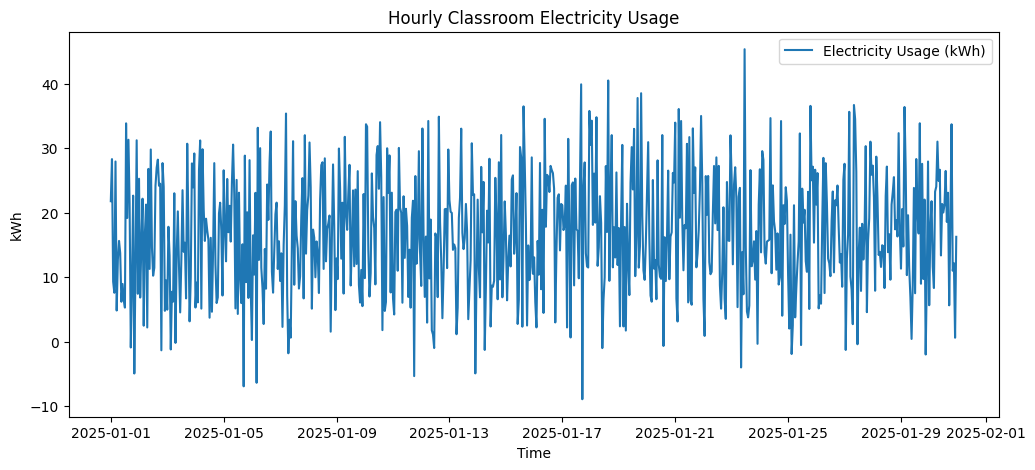

In [9]:
plt.figure(figsize=(12,5))
plt.plot(data["electricity_kwh"], label="Electricity Usage (kWh)")
plt.title("Hourly Classroom Electricity Usage")
plt.xlabel("Time")
plt.ylabel("kWh")
plt.legend()
plt.show()


In [11]:
train = data.iloc[:-24]
test = data.iloc[-24:]



In [12]:
model = ARIMA(train["electricity_kwh"], order=(2,1,2))  # (p,d,q)
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:        electricity_kwh   No. Observations:                  696
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2552.063
Date:                Thu, 22 Jan 2026   AIC                           5114.126
Time:                        05:15:26   BIC                           5136.846
Sample:                    01-01-2025   HQIC                          5122.911
                         - 01-29-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9288      0.226     -4.118      0.000      -1.371      -0.487
ar.L2         -0.0733      0.038     -1.923      0.054      -0.148       0.001
ma.L1         -0.1247      0.223     -0.559      0.5

In [13]:
forecast = model_fit.get_forecast(steps=24)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


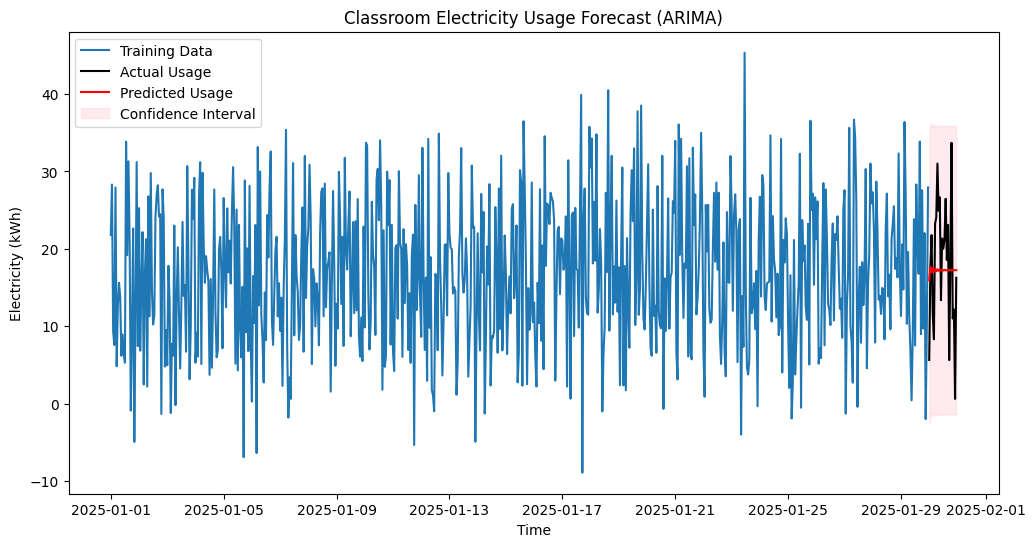

In [14]:
plt.figure(figsize=(12,6))

# Plot training data
plt.plot(train.index, train["electricity_kwh"], label="Training Data")

# Plot actual test data
plt.plot(test.index, test["electricity_kwh"], label="Actual Usage", color="black")

# Plot forecast
plt.plot(test.index, forecast_mean, label="Predicted Usage", color="red")

# Confidence intervals
plt.fill_between(
    test.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink', alpha=0.3,
    label="Confidence Interval"
)

plt.title("Classroom Electricity Usage Forecast (ARIMA)")
plt.xlabel("Time")
plt.ylabel("Electricity (kWh)")
plt.legend()
plt.show()
